### Import libraries and datasets

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the datasets
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [46]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [47]:
exercise.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [48]:
# Merge datasets on a common key (assuming 'ID' column exists)
merged_data = pd.concat([exercise, calories['Calories']], axis=1)
merged_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [49]:
calories.info()
calories.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


User_ID     0
Calories    0
dtype: int64

In [50]:
calories.describe()

,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


### Encoding

In [52]:
# encoding
print("Unique Gender Values Before Mapping:")
print(merged_data['Gender'].unique())

# Convert to lowercase to ensure case-insensitive mapping
merged_data['Gender'] = merged_data['Gender'].str.lower()

print("\nUnique Gender Values After Converting to Lowercase:")
print(merged_data['Gender'].unique())

# Define the gender map
gender_map = {'female': 1, 'male': 0}

# Apply the gender mapping
merged_data['Gender'] = merged_data['Gender'].map(gender_map)

print("\nPreprocessed Merged Dataset:")
print(merged_data.head())


Unique Gender Values Before Mapping:
['male' 'female']

Unique Gender Values After Converting to Lowercase:
['male' 'female']

Preprocessed Merged Dataset:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       1   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


### Distribution plots of datasets

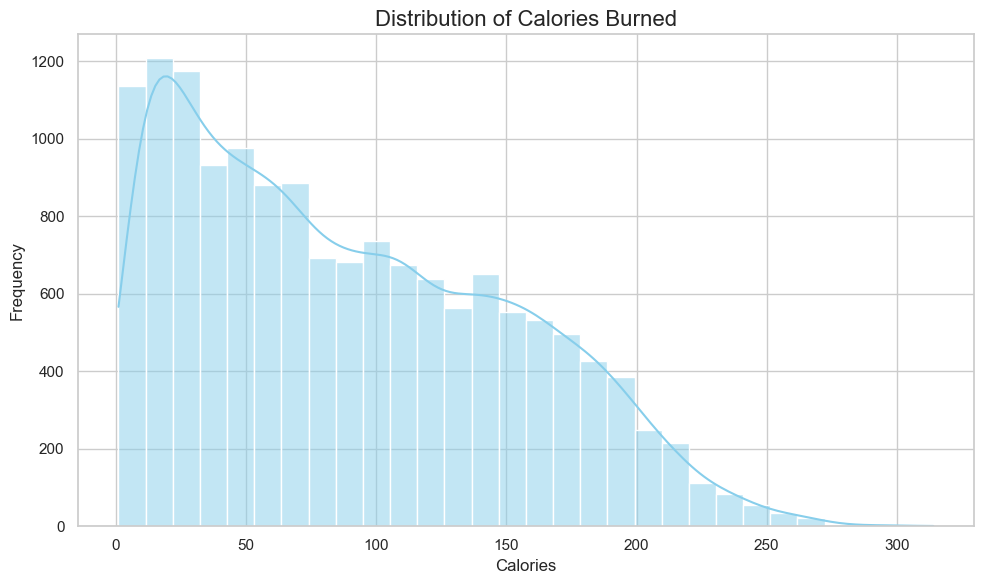

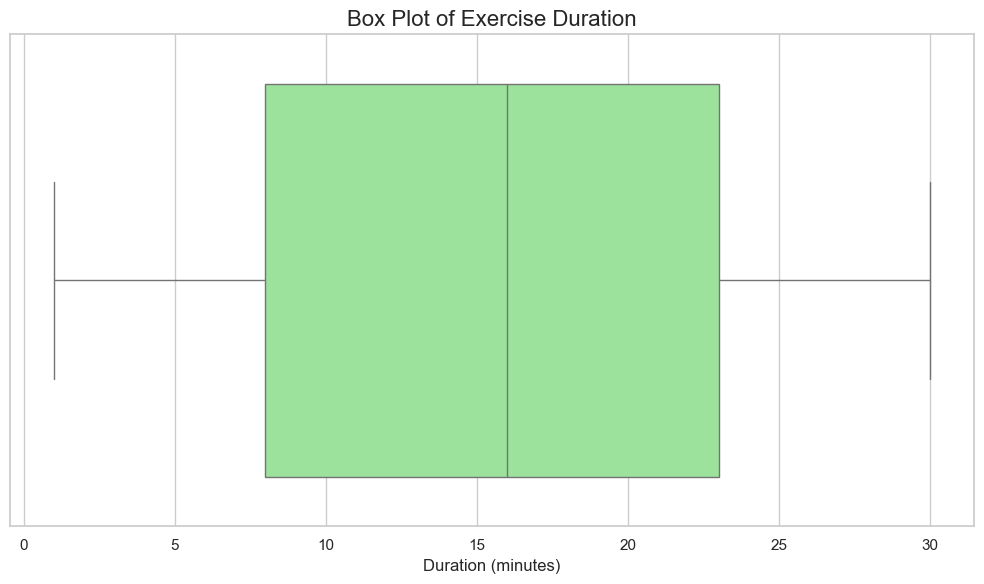

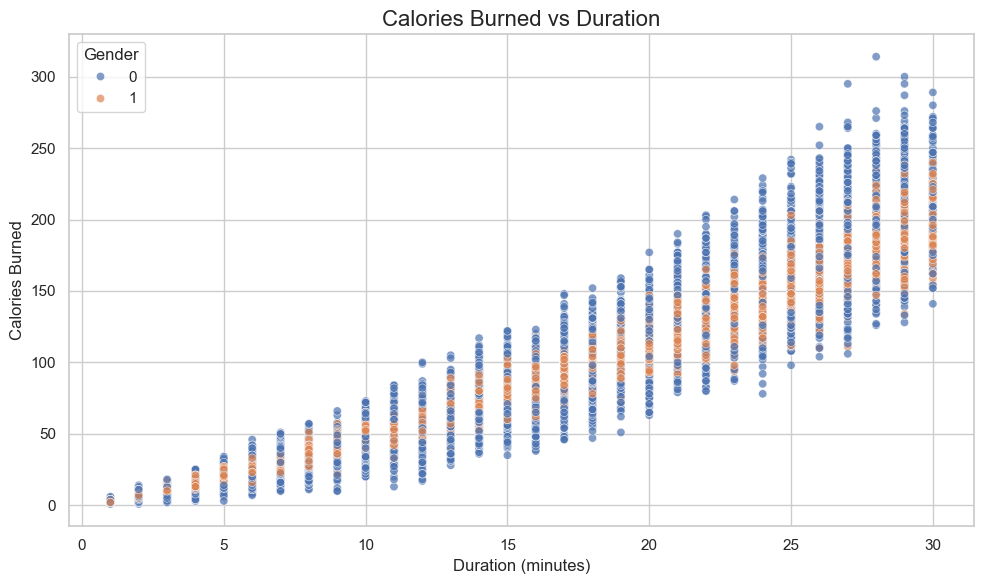

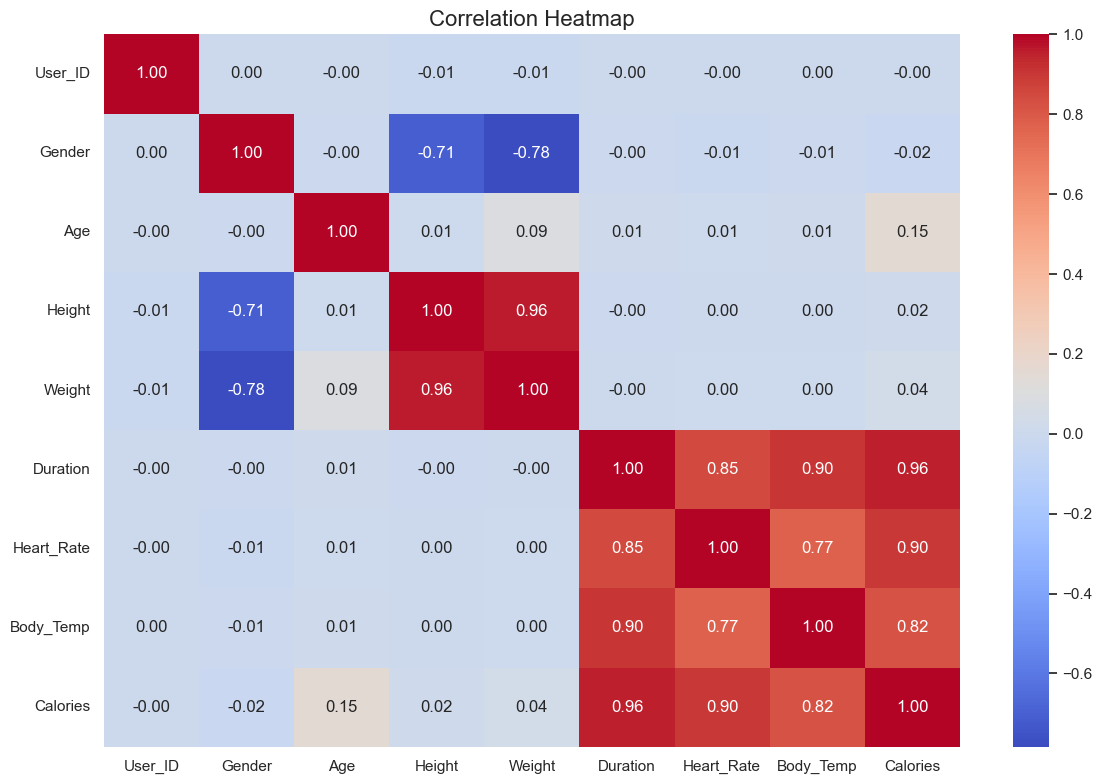

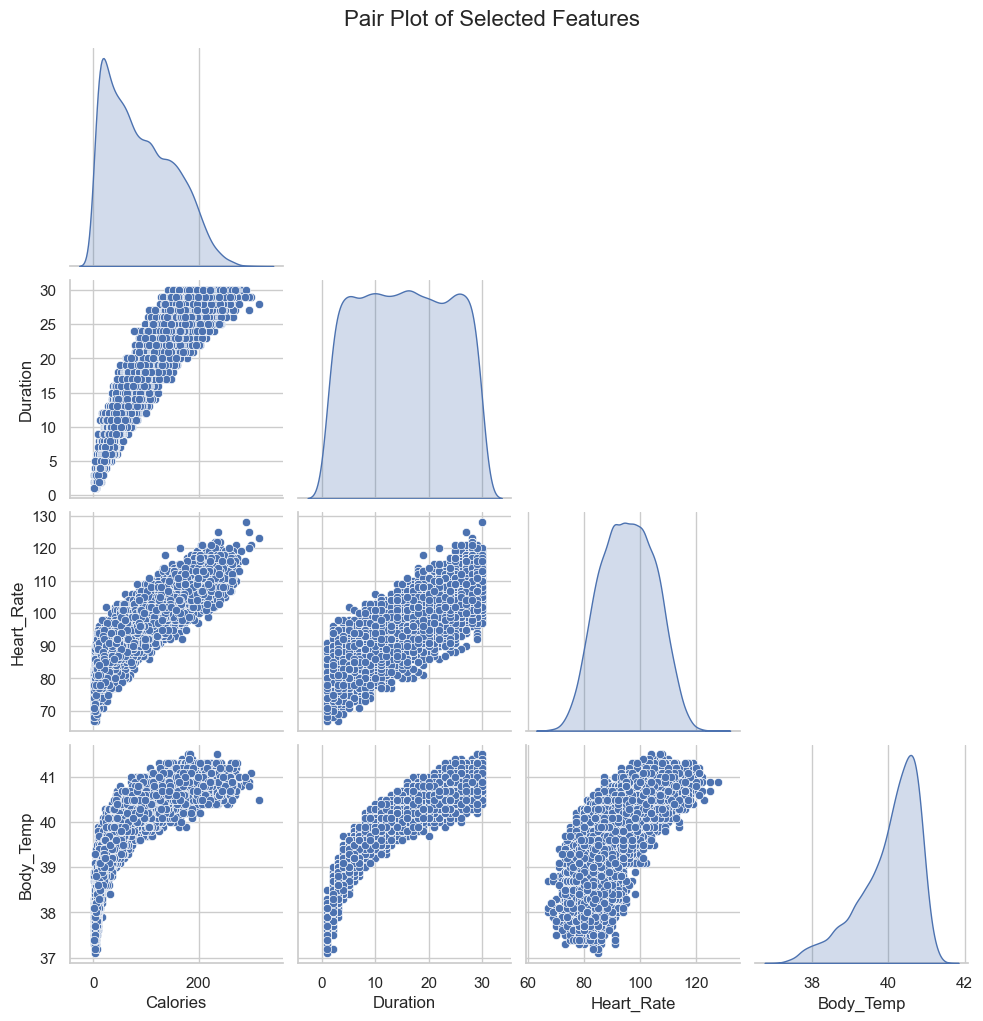

/var/folders/hq/zygjk6_x6_zbfsr0pys4v_qc0000gn/T/ipykernel_98963/1135450724.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='Gender', y='Calories', palette='muted')


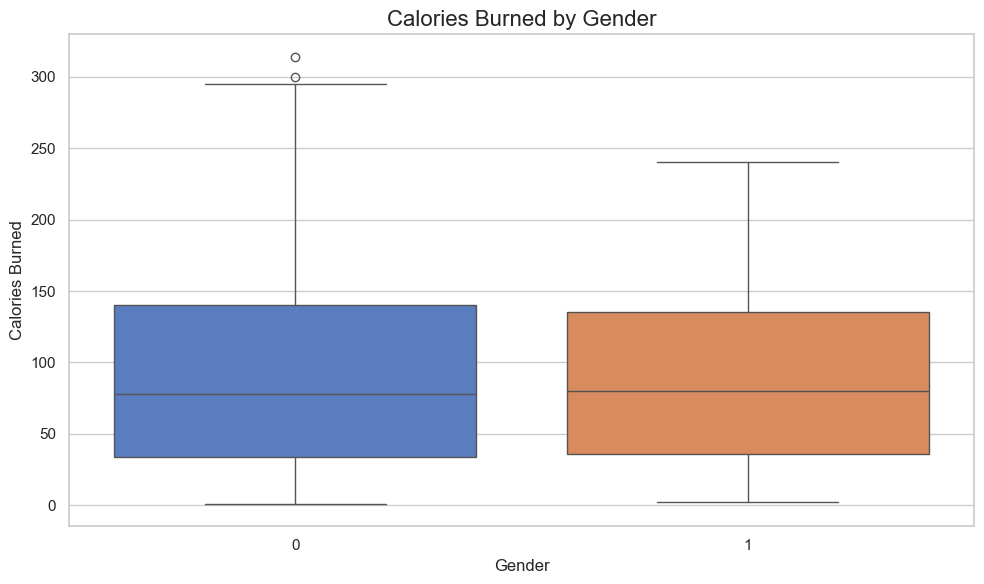

In [54]:
# Set plot style
sns.set(style="whitegrid")

# 1. Distribution of Calories
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Calories'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Calories Burned', fontsize=16)
plt.xlabel('Calories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Distribution of Duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_data['Duration'], color='lightgreen')
plt.title('Box Plot of Exercise Duration', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Scatter Plot: Calories vs Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Duration', y='Calories', hue='Gender', alpha=0.7)
plt.title('Calories Burned vs Duration', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

# 5. Pair Plot for Selected Features
selected_features = ['Calories', 'Duration', 'Heart_Rate', 'Body_Temp']
sns.pairplot(merged_data[selected_features], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Selected Features', y=1.02, fontsize=16)
plt.show()

# 6. Gender Distribution of Calories
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Gender', y='Calories', palette='muted')
plt.title('Calories Burned by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.tight_layout()
plt.show()


### Introduce null values in 10% of the data

In [56]:
# Calculate the total number of cells in the DataFrame
total_cells = merged_data.shape[0] * merged_data.shape[1]

# Calculate 10% of the total cells to introduce null values
num_null_values = int(0.1 * total_cells)

# Generate random indices to introduce null values
np.random.seed(0)  # For reproducibility
null_indices = np.random.choice(total_cells, num_null_values, replace=False)

# Reshape the indices to match DataFrame dimensions for easy null value assignment
null_indices_reshaped = [divmod(idx, merged_data.shape[1]) for idx in null_indices]

# Introduce null values at the calculated indices
for row, col in null_indices_reshaped:
    merged_data.iat[row, col] = np.nan

print("\nUpdated Dataset Shape:", merged_data.shape)
print("Updated Missing Values Count:", merged_data.isnull().sum().sum())
merged_data.head()


Updated Dataset Shape: (15000, 9)
Updated Missing Values Count: 13500


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363.0,0.0,68.0,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698.0,1.0,20.0,NaN,60.0,14.0,94.0,40.3,NaN
2,11179863.0,0.0,69.0,179.0,79.0,NaN,88.0,38.7,26.0
3,16180408.0,1.0,NaN,179.0,71.0,13.0,100.0,40.5,71.0
4,NaN,1.0,27.0,154.0,58.0,NaN,81.0,39.8,35.0


### Replace the null values 

In [58]:
# Identify numerical columns
numerical_columns = merged_data.select_dtypes(include=[np.number]).columns

# Function to handle missing values based on a specific strategy
def replace_nulls(data, column, strategy):
    if strategy == 'min':
        return data[column].fillna(data[column].min())
    elif strategy == 'max':
        return data[column].fillna(data[column].max())
    elif strategy == 'mean':
        return data[column].fillna(data[column].mean())
    elif strategy == 'std':
        return data[column].fillna(data[column].std())
    elif strategy == 'standardized':
        # Replace with standardized (Z-score) value
        mean = data[column].mean()
        std = data[column].std()
        standardized_value = (mean - mean) / std  # Z-score for the mean is 0
        return data[column].fillna(standardized_value)

# Create and print datasets for each strategy
imputation_strategies = ['min', 'max', 'mean', 'std', 'standardized']
imputed_datasets = {}

for strategy in imputation_strategies:
    data_copy = merged_data.copy()
    for column in numerical_columns:
        if data_copy[column].isnull().any():
            data_copy[column] = replace_nulls(data_copy, column, strategy)
    imputed_datasets[strategy] = data_copy
    # Save the imputed dataset for each strategy
    data_copy.to_csv(f'dataset_imputed_{strategy}.csv', index=False)
    print(f"\nDataset imputed with '{strategy}':")
    print(data_copy.head())  # Print the first 5 rows of the dataset



Dataset imputed with 'min':
      User_ID  Gender   Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363.0     0.0  68.0   190.0    94.0      29.0       105.0       40.8   
1  14861698.0     1.0  20.0   123.0    60.0      14.0        94.0       40.3   
2  11179863.0     0.0  69.0   179.0    79.0       1.0        88.0       38.7   
3  16180408.0     1.0  20.0   179.0    71.0      13.0       100.0       40.5   
4  10001159.0     1.0  27.0   154.0    58.0       1.0        81.0       39.8   

   Calories  
0     231.0  
1       1.0  
2      26.0  
3      71.0  
4      35.0  

Dataset imputed with 'max':
      User_ID  Gender   Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363.0     0.0  68.0   190.0    94.0      29.0       105.0       40.8   
1  14861698.0     1.0  20.0   222.0    60.0      14.0        94.0       40.3   
2  11179863.0     0.0  69.0   179.0    79.0      30.0        88.0       38.7   
3  16180408.0     1.0  79.0   179.0    71.0      13.0    

### linear regression 

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# List of imputed dataset filenames
imputed_datasets = {
    'min': 'dataset_imputed_min.csv',
    'max': 'dataset_imputed_max.csv',
    'mean': 'dataset_imputed_mean.csv',
    'std': 'dataset_imputed_std.csv',
    'standardized': 'dataset_imputed_standardized.csv'
}

# Placeholder for all results
results = []

# Apply Linear Regression to each dataset
for strategy, file_name in imputed_datasets.items():
    print(f"\nProcessing dataset: {strategy}")
    
    # Load the dataset
    dataset = pd.read_csv(file_name)
    
    # Features (X) and target (y)
    X = dataset.drop(columns=['Calories'])  # Replace 'Calories' with the target column name
    y = dataset['Calories']
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results
    results.append({
        'Imputation Strategy': strategy,
        'R-squared': r2,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse
    })
    
    print(f"Linear Regression (Imputation: {strategy}):")
    print(f"  R-squared: {r2}")
    print(f"  Mean Absolute Error: {mae}")
    print(f"  Root Mean Squared Error: {rmse}\n")

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Save results for Linear Regression
results_df.to_csv('linear_regression_metrics_comparison.csv', index=False)
print("\nLinear Regression Metrics for All Imputed Datasets:")
print(results_df)


Processing dataset: min
Linear Regression (Imputation: min):
  R-squared: 0.5458136461686649
  Mean Absolute Error: 28.24157589427928
  Root Mean Squared Error: 44.638139370339594


Processing dataset: max
Linear Regression (Imputation: max):
  R-squared: 0.29308968606594243
  Mean Absolute Error: 47.56030961071228
  Root Mean Squared Error: 75.7022973526462


Processing dataset: mean
Linear Regression (Imputation: mean):
  R-squared: 0.8108916318123328
  Mean Absolute Error: 17.525874694093524
  Root Mean Squared Error: 26.274776620516473


Processing dataset: std
Linear Regression (Imputation: std):
  R-squared: 0.6869484931637353
  Mean Absolute Error: 21.580289219241678
  Root Mean Squared Error: 34.14934954902919


Processing dataset: standardized
Linear Regression (Imputation: standardized):
  R-squared: 0.4674150199290378
  Mean Absolute Error: 31.44552639242937
  Root Mean Squared Error: 48.42755420788531


Linear Regression Metrics for All Imputed Datasets:
  Imputation Strat

### ridge regression

In [62]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# List of imputed dataset filenames
imputed_datasets = {
    'min': 'dataset_imputed_min.csv',
    'max': 'dataset_imputed_max.csv',
    'mean': 'dataset_imputed_mean.csv',
    'std': 'dataset_imputed_std.csv',
    'standardized': 'dataset_imputed_standardized.csv'
}

# Placeholder for all results
results = []

# Apply Ridge Regression to each dataset
for strategy, file_name in imputed_datasets.items():
    print(f"\nProcessing dataset: {strategy}")
    
    # Load the dataset
    dataset = pd.read_csv(file_name)
    
    # Features (X) and target (y)
    X = dataset.drop(columns=['Calories'])  # Replace 'Calories' with the target column name
    y = dataset['Calories']
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the data for Ridge Regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train the Ridge Regression model
    model = Ridge()
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results
    results.append({
        'Imputation Strategy': strategy,
        'R-squared': r2,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse
    })
    
    print(f"Ridge Regression (Imputation: {strategy}):")
    print(f"  R-squared: {r2}")
    print(f"  Mean Absolute Error: {mae}")
    print(f"  Root Mean Squared Error: {rmse}\n")

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Save results for Ridge Regression
results_df.to_csv('ridge_regression_metrics_comparison.csv', index=False)
print("\nRidge Regression Metrics for All Imputed Datasets:")
print(results_df)


Processing dataset: min
Ridge Regression (Imputation: min):
  R-squared: 0.5458158342670132
  Mean Absolute Error: 28.242384530433892
  Root Mean Squared Error: 44.63803184536021


Processing dataset: max
Ridge Regression (Imputation: max):
  R-squared: 0.29308942892072154
  Mean Absolute Error: 47.561169557262396
  Root Mean Squared Error: 75.70231112135338


Processing dataset: mean
Ridge Regression (Imputation: mean):
  R-squared: 0.810893287052848
  Mean Absolute Error: 17.526848709085378
  Root Mean Squared Error: 26.274661630443916


Processing dataset: std
Ridge Regression (Imputation: std):
  R-squared: 0.6869494626987491
  Mean Absolute Error: 21.581284215543622
  Root Mean Squared Error: 34.14929666792975


Processing dataset: standardized
Ridge Regression (Imputation: standardized):
  R-squared: 0.46741703520558076
  Mean Absolute Error: 31.446856480006208
  Root Mean Squared Error: 48.42746258400367


Ridge Regression Metrics for All Imputed Datasets:
  Imputation Strategy

### lasso regression

In [64]:
from sklearn.linear_model import Lasso

# Placeholder for all results
results = []

# Apply Lasso Regression to each dataset
for strategy, file_name in imputed_datasets.items():
    print(f"\nProcessing dataset: {strategy}")
    
    # Load the dataset
    dataset = pd.read_csv(file_name)
    
    # Features (X) and target (y)
    X = dataset.drop(columns=['Calories'])  # Replace 'Calories' with the target column name
    y = dataset['Calories']
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the data for Lasso Regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train the Lasso Regression model
    model = Lasso()
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results
    results.append({
        'Imputation Strategy': strategy,
        'R-squared': r2,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse
    })
    
    print(f"Lasso Regression (Imputation: {strategy}):")
    print(f"  R-squared: {r2}")
    print(f"  Mean Absolute Error: {mae}")
    print(f"  Root Mean Squared Error: {rmse}\n")

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Save results for Lasso Regression
results_df.to_csv('lasso_regression_metrics_comparison.csv', index=False)
print("\nLasso Regression Metrics for All Imputed Datasets:")
print(results_df)


Processing dataset: min
Lasso Regression (Imputation: min):
  R-squared: 0.545215416883313
  Mean Absolute Error: 28.46177071021405
  Root Mean Squared Error: 44.667527147589944


Processing dataset: max
Lasso Regression (Imputation: max):
  R-squared: 0.2917138822754727
  Mean Absolute Error: 48.056563661620125
  Root Mean Squared Error: 75.77592824993245


Processing dataset: mean
Lasso Regression (Imputation: mean):
  R-squared: 0.8095489871302488
  Mean Absolute Error: 17.604091300200277
  Root Mean Squared Error: 26.36788538666757


Processing dataset: std
Lasso Regression (Imputation: std):
  R-squared: 0.6861275880686556
  Mean Absolute Error: 21.79025815444517
  Root Mean Squared Error: 34.194094616093416


Processing dataset: standardized
Lasso Regression (Imputation: standardized):
  R-squared: 0.4674123136605147
  Mean Absolute Error: 31.808992654081027
  Root Mean Squared Error: 48.42767724721614


Lasso Regression Metrics for All Imputed Datasets:
  Imputation Strategy  R

### random forest regression

In [66]:
from sklearn.ensemble import RandomForestRegressor

# Placeholder for all results
results = []

# Apply Random Forest Regression to each dataset
for strategy, file_name in imputed_datasets.items():
    print(f"\nProcessing dataset: {strategy}")
    
    # Load the dataset
    dataset = pd.read_csv(file_name)
    
    # Features (X) and target (y)
    X = dataset.drop(columns=['Calories'])  # Replace 'Calories' with the target column name
    y = dataset['Calories']
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the Random Forest Regression model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results
    results.append({
        'Imputation Strategy': strategy,
        'R-squared': r2,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse
    })
    
    print(f"Random Forest Regression (Imputation: {strategy}):")
    print(f"  R-squared: {r2}")
    print(f"  Mean Absolute Error: {mae}")
    print(f"  Root Mean Squared Error: {rmse}\n")

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Save results for Random Forest Regression
results_df.to_csv('random_forest_regression_metrics_comparison.csv', index=False)
print("\nRandom Forest Regression Metrics for All Imputed Datasets:")
print(results_df)


Processing dataset: min
Random Forest Regression (Imputation: min):
  R-squared: 0.7201097150791047
  Mean Absolute Error: 19.03384
  Root Mean Squared Error: 35.04152151757493


Processing dataset: max
Random Forest Regression (Imputation: max):
  R-squared: 0.3211391203563134
  Mean Absolute Error: 46.682496666666665
  Root Mean Squared Error: 74.18520335821692


Processing dataset: mean
Random Forest Regression (Imputation: mean):
  R-squared: 0.8745993456394328
  Mean Absolute Error: 12.779961201127671
  Root Mean Squared Error: 21.396047840388448


Processing dataset: std
Random Forest Regression (Imputation: std):
  R-squared: 0.8597628398165791
  Mean Absolute Error: 12.84076139699366
  Root Mean Squared Error: 22.856308594494504


Processing dataset: standardized
Random Forest Regression (Imputation: standardized):
  R-squared: 0.7165434929954544
  Mean Absolute Error: 19.16325666666667
  Root Mean Squared Error: 35.32980938574865


Random Forest Regression Metrics for All Imp

### support vector regression 

In [68]:
from sklearn.svm import SVR

# Placeholder for all results
results = []

# Apply Support Vector Regression to each dataset
for strategy, file_name in imputed_datasets.items():
    print(f"\nProcessing dataset: {strategy}")
    
    # Load the dataset
    dataset = pd.read_csv(file_name)
    
    # Features (X) and target (y)
    X = dataset.drop(columns=['Calories'])  # Replace 'Calories' with the target column name
    y = dataset['Calories']
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the data for Support Vector Regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train the Support Vector Regression model
    model = SVR()
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results
    results.append({
        'Imputation Strategy': strategy,
        'R-squared': r2,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse
    })
    
    print(f"Support Vector Regression (Imputation: {strategy}):")
    print(f"  R-squared: {r2}")
    print(f"  Mean Absolute Error: {mae}")
    print(f"  Root Mean Squared Error: {rmse}\n")

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Save results for Support Vector Regression
results_df.to_csv('svr_metrics_comparison.csv', index=False)
print("\nSupport Vector Regression Metrics for All Imputed Datasets:")
print(results_df)


Processing dataset: min
Support Vector Regression (Imputation: min):
  R-squared: 0.6794523843622209
  Mean Absolute Error: 18.615341683269445
  Root Mean Squared Error: 37.50034976703995


Processing dataset: max
Support Vector Regression (Imputation: max):
  R-squared: 0.31294794273376103
  Mean Absolute Error: 31.57678619894034
  Root Mean Squared Error: 74.63142300602065


Processing dataset: mean
Support Vector Regression (Imputation: mean):
  R-squared: 0.8291758655875134
  Mean Absolute Error: 13.788542457684496
  Root Mean Squared Error: 24.972284457868994


Processing dataset: std
Support Vector Regression (Imputation: std):
  R-squared: 0.7261528397005524
  Mean Absolute Error: 17.678417080741248
  Root Mean Squared Error: 31.93954004144628


Processing dataset: standardized
Support Vector Regression (Imputation: standardized):
  R-squared: 0.6006802554885843
  Mean Absolute Error: 22.212239039856616
  Root Mean Squared Error: 41.933244953034084


Support Vector Regression M

### decision tree

In [70]:
from sklearn.tree import DecisionTreeRegressor

# Placeholder for all results
results = []

# Apply Decision Tree Regression to each dataset
for strategy, file_name in imputed_datasets.items():
    print(f"\nProcessing dataset: {strategy}")
    
    # Load the dataset
    dataset = pd.read_csv(file_name)
    
    # Features (X) and target (y)
    X = dataset.drop(columns=['Calories'])  # Replace 'Calories' with the target column name
    y = dataset['Calories']
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the Decision Tree Regression model
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results
    results.append({
        'Imputation Strategy': strategy,
        'R-squared': r2,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse
    })
    
    print(f"Decision Tree Regression (Imputation: {strategy}):")
    print(f"  R-squared: {r2}")
    print(f"  Mean Absolute Error: {mae}")
    print(f"  Root Mean Squared Error: {rmse}\n")

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Save results for Decision Tree Regression
results_df.to_csv('decision_tree_metrics_comparison.csv', index=False)
print("\nDecision Tree Regression Metrics for All Imputed Datasets:")
print(results_df)


Processing dataset: min
Decision Tree Regression (Imputation: min):
  R-squared: 0.43635054534778017
  Mean Absolute Error: 24.669666666666668
  Root Mean Squared Error: 49.727152207487876


Processing dataset: max
Decision Tree Regression (Imputation: max):
  R-squared: -0.3975839294952863
  Mean Absolute Error: 53.910666666666664
  Root Mean Squared Error: 106.44269193639677


Processing dataset: mean
Decision Tree Regression (Imputation: mean):
  R-squared: 0.7349007480418883
  Mean Absolute Error: 17.235833296238592
  Root Mean Squared Error: 31.109133172350987


Processing dataset: std
Decision Tree Regression (Imputation: std):
  R-squared: 0.7020106953778023
  Mean Absolute Error: 17.54064763753719
  Root Mean Squared Error: 33.31768938909953


Processing dataset: standardized
Decision Tree Regression (Imputation: standardized):
  R-squared: 0.41994545846476494
  Mean Absolute Error: 24.884
  Root Mean Squared Error: 50.53968077989149


Decision Tree Regression Metrics for All 

### Combine the results

In [72]:
# Load the results for all models
linear_results = pd.read_csv('linear_regression_metrics_comparison.csv')
ridge_results = pd.read_csv('ridge_regression_metrics_comparison.csv')
lasso_results = pd.read_csv('lasso_regression_metrics_comparison.csv')
random_forest_results = pd.read_csv('random_forest_regression_metrics_comparison.csv')
svr_results = pd.read_csv('svr_metrics_comparison.csv')
decision_tree_results = pd.read_csv('decision_tree_metrics_comparison.csv')

# Add a column to indicate the model used in each dataset
linear_results['Model'] = 'Linear Regression'
ridge_results['Model'] = 'Ridge Regression'
lasso_results['Model'] = 'Lasso Regression'
random_forest_results['Model'] = 'Random Forest Regression'
svr_results['Model'] = 'Support Vector Regression'
decision_tree_results['Model'] = 'Decision Tree Regression'

# Combine all results into a single DataFrame
all_results = pd.concat(
    [linear_results, ridge_results, lasso_results, random_forest_results, svr_results, decision_tree_results],
    ignore_index=True
)

# Save consolidated results to a CSV file
all_results.to_csv('all_models_comparison.csv', index=False)

# Print consolidated results
print("\nConsolidated Results Across All Models:")
print(all_results)


Consolidated Results Across All Models:
   Imputation Strategy  R-squared  Mean Absolute Error  \
0                  min   0.545814            28.241576   
1                  max   0.293090            47.560310   
2                 mean   0.810892            17.525875   
3                  std   0.686948            21.580289   
4         standardized   0.467415            31.445526   
5                  min   0.545816            28.242385   
6                  max   0.293089            47.561170   
7                 mean   0.810893            17.526849   
8                  std   0.686949            21.581284   
9         standardized   0.467417            31.446856   
10                 min   0.545215            28.461771   
11                 max   0.291714            48.056564   
12                mean   0.809549            17.604091   
13                 std   0.686128            21.790258   
14        standardized   0.467412            31.808993   
15                 min   0.7201

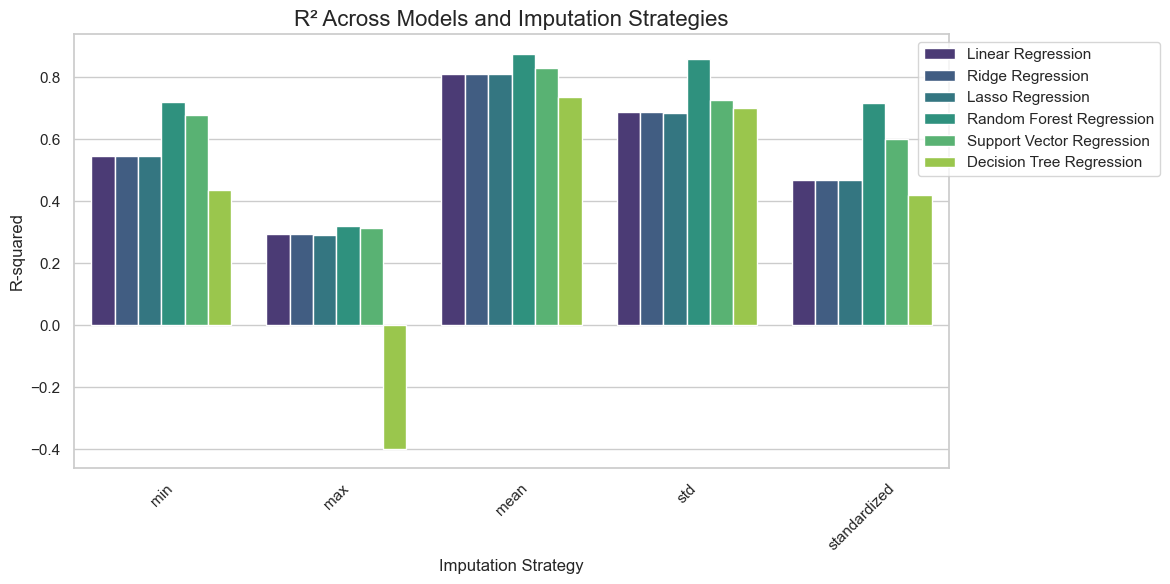

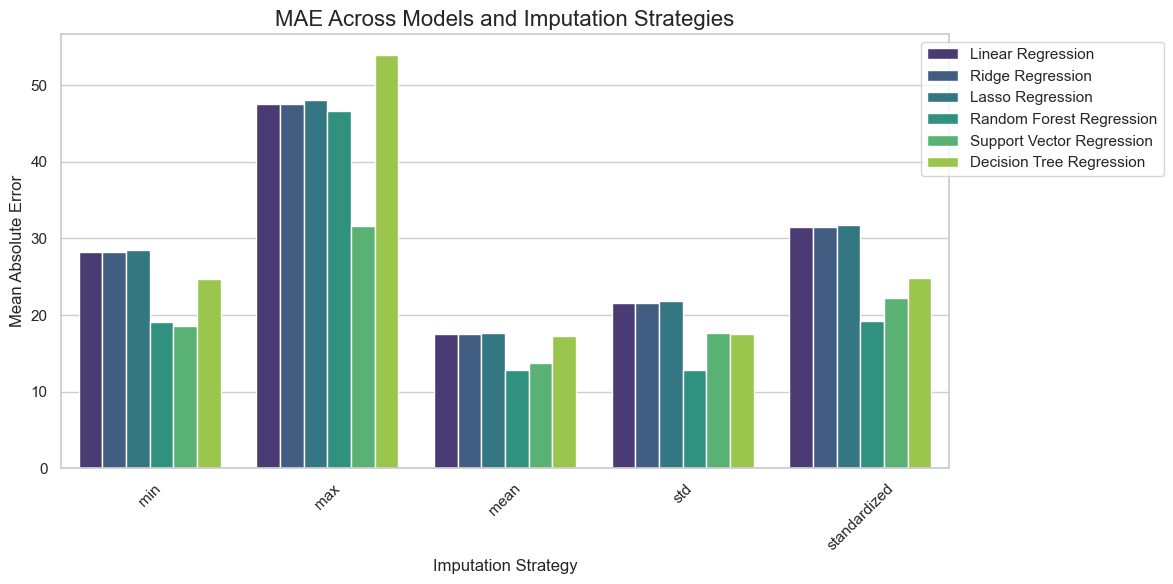

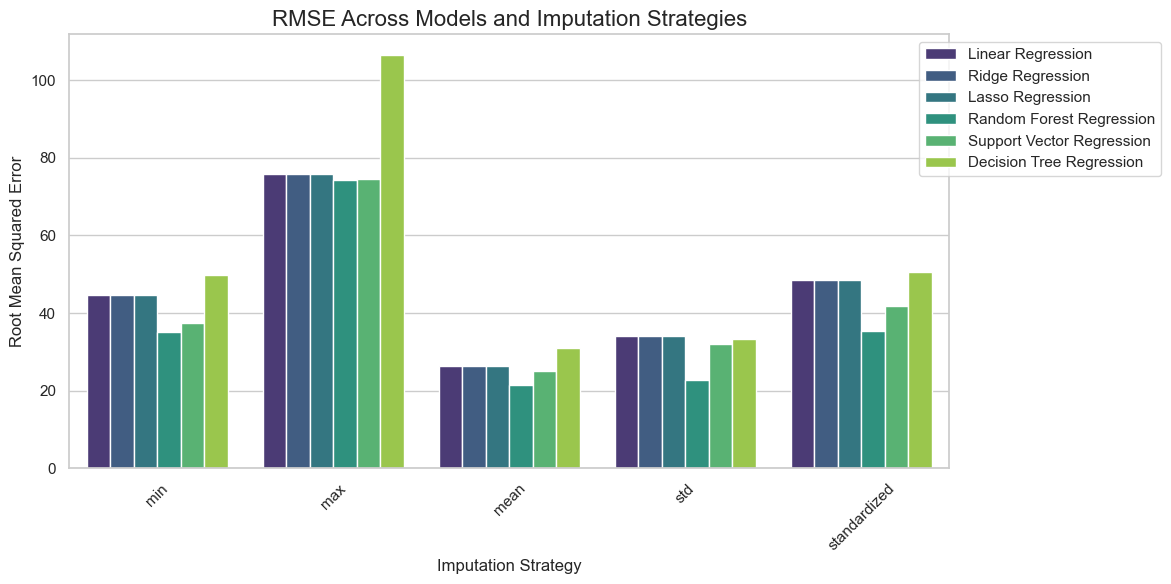

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the consolidated results
all_results = pd.read_csv('all_models_comparison.csv')

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Function to plot grouped bar charts for a specific metric
def plot_metric(metric, title, ylabel):
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=all_results,
        x='Imputation Strategy',
        y=metric,
        hue='Model',
        palette='viridis'
    )
    plt.title(title, fontsize=16)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel("Imputation Strategy", fontsize=12)
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot R-squared for all models and datasets
plot_metric('R-squared', "R² Across Models and Imputation Strategies", "R-squared")

# Plot Mean Absolute Error for all models and datasets
plot_metric('Mean Absolute Error', "MAE Across Models and Imputation Strategies", "Mean Absolute Error")

# Plot Root Mean Squared Error for all models and datasets
plot_metric('Root Mean Squared Error', "RMSE Across Models and Imputation Strategies", "Root Mean Squared Error")

### best prediction model

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the consolidated results
all_results = pd.read_csv('all_models_comparison.csv')

# Define metrics (ensure they match the actual columns in your data)
metrics = ['R-squared', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']

# Check for available columns
print(all_results.columns)

# Normalize scores to compare across metrics
for metric in metrics:
    if metric in all_results.columns:
        if metric == 'R-squared':  # Higher is better
            all_results[f'{metric}_normalized'] = all_results[metric] / all_results[metric].max()
        else:  # Lower is better
            all_results[f'{metric}_normalized'] = all_results[metric].min() / all_results[metric]
    else:
        print(f"Warning: Column '{metric}' not found in the data. Skipping normalization.")

# Aggregate normalized scores for ranking
normalized_columns = [f'{m}_normalized' for m in metrics if f'{m}_normalized' in all_results.columns]
all_results['Overall Score'] = all_results[normalized_columns].mean(axis=1)

# Select the top-performing model and strategy
best_model = all_results['Overall Score'].idxmax()
best_model_results = all_results.loc[best_model]

# Access the actual best model and imputation strategy
best_model_name = all_results.loc[best_model, 'Model']  # Replace 'Model' with the correct column name
best_imputation_strategy = all_results.loc[best_model, 'Imputation Strategy']  # Replace with correct column name

print(f"Best Model: {best_model_name}, Best Imputation Strategy: {best_imputation_strategy}")
print(best_model_results)

# Highlight predictions vs actuals for the best model
# Assume we have a predictions DataFrame for the best model (e.g., predictions.csv)
try:
    predictions = pd.read_csv('predictions.csv')  # Replace with the actual file if needed
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='Actual', y='Predicted', data=predictions,
        alpha=0.6, edgecolor=None
    )
    plt.plot([predictions['Actual'].min(), predictions['Actual'].max()],
             [predictions['Actual'].min(), predictions['Actual'].max()],
             color='red', linestyle='--')
    plt.title(f"Best Model Predictions: {best_model_name} ({best_imputation_strategy})", fontsize=16)
    plt.xlabel("Actual Values", fontsize=12)
    plt.ylabel("Predicted Values", fontsize=12)
    plt.tight_layout()
    plt.show()
except FileNotFoundError:
    print("Predictions file not found. Skipping prediction visualization.")


Index(['Imputation Strategy', 'R-squared', 'Mean Absolute Error',
       'Root Mean Squared Error', 'Model'],
      dtype='object')
Best Model: Random Forest Regression, Best Imputation Strategy: mean
Imputation Strategy                                       mean
R-squared                                             0.874599
Mean Absolute Error                                  12.779961
Root Mean Squared Error                              21.396048
Model                                 Random Forest Regression
R-squared_normalized                                       1.0
Mean Absolute Error_normalized                             1.0
Root Mean Squared Error_normalized                         1.0
Overall Score                                              1.0
Name: 17, dtype: object
Predictions file not found. Skipping prediction visualization.


### plots comparing imputated datasets

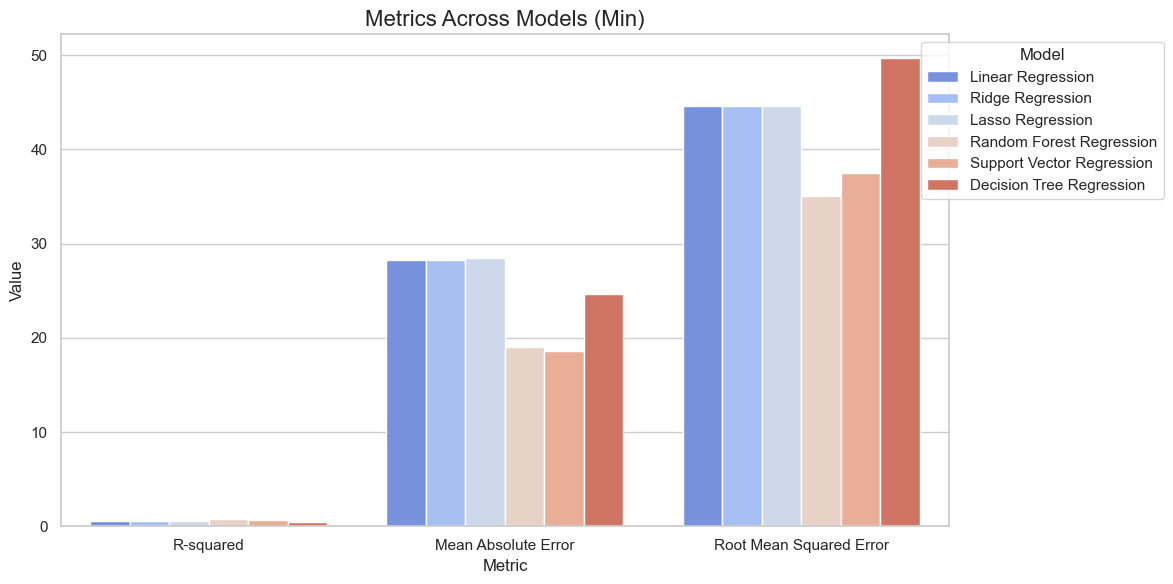

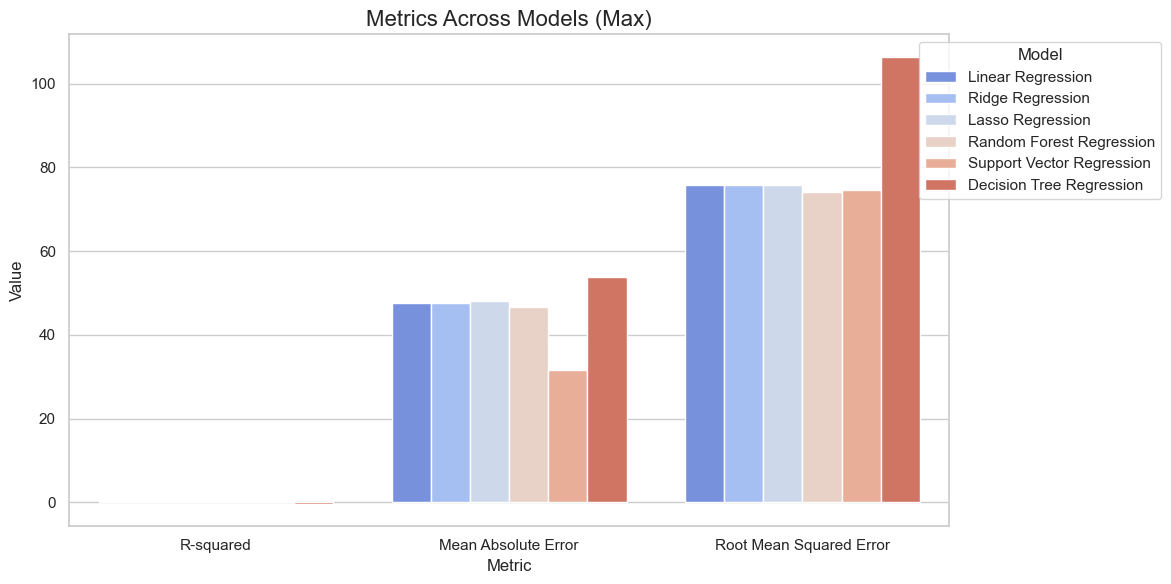

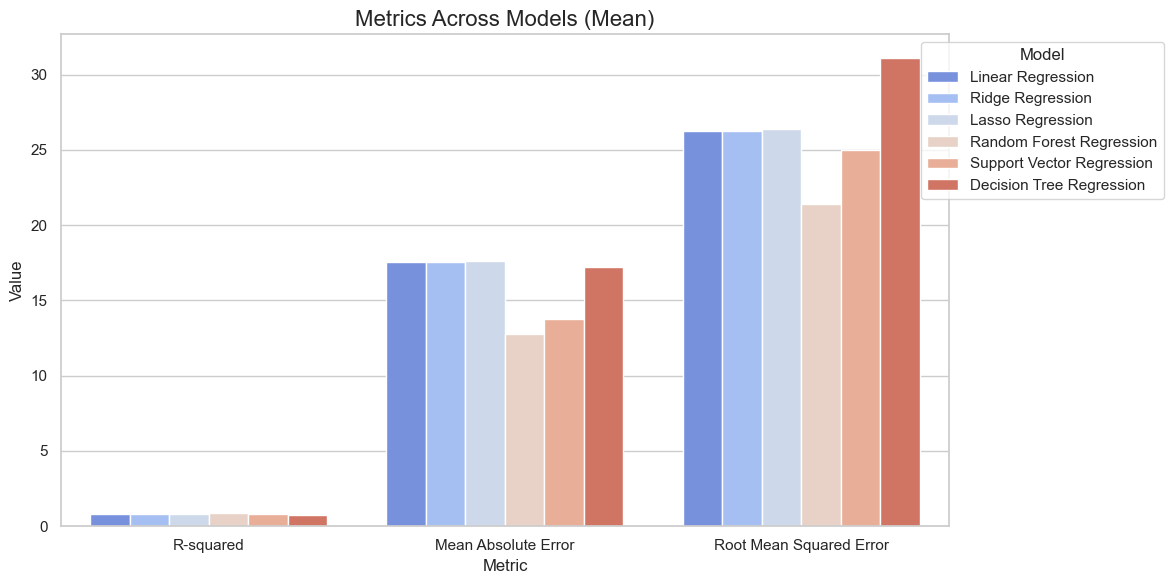

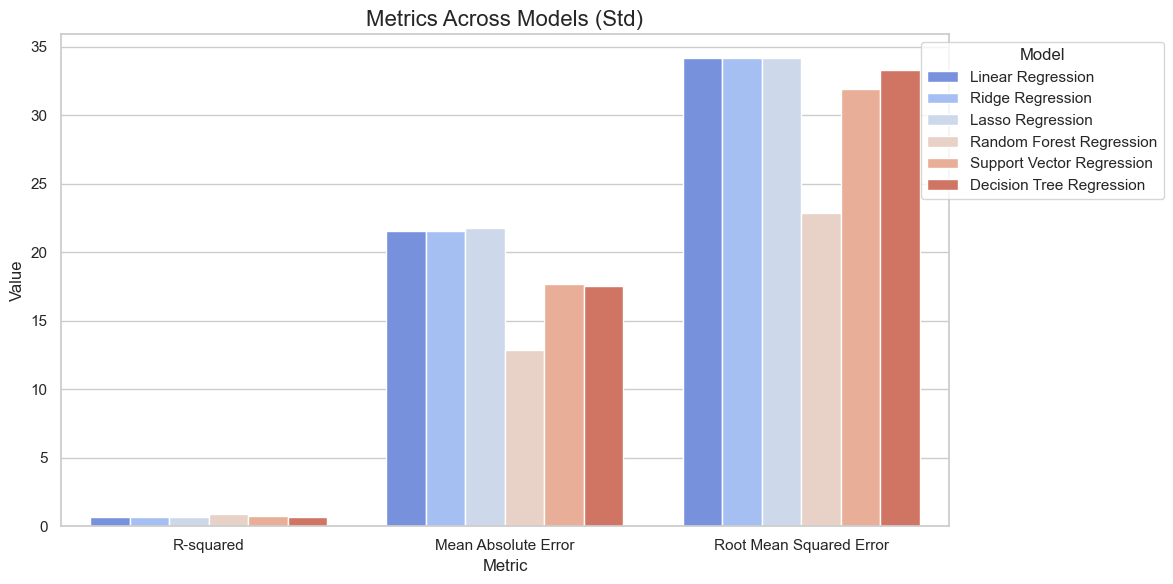

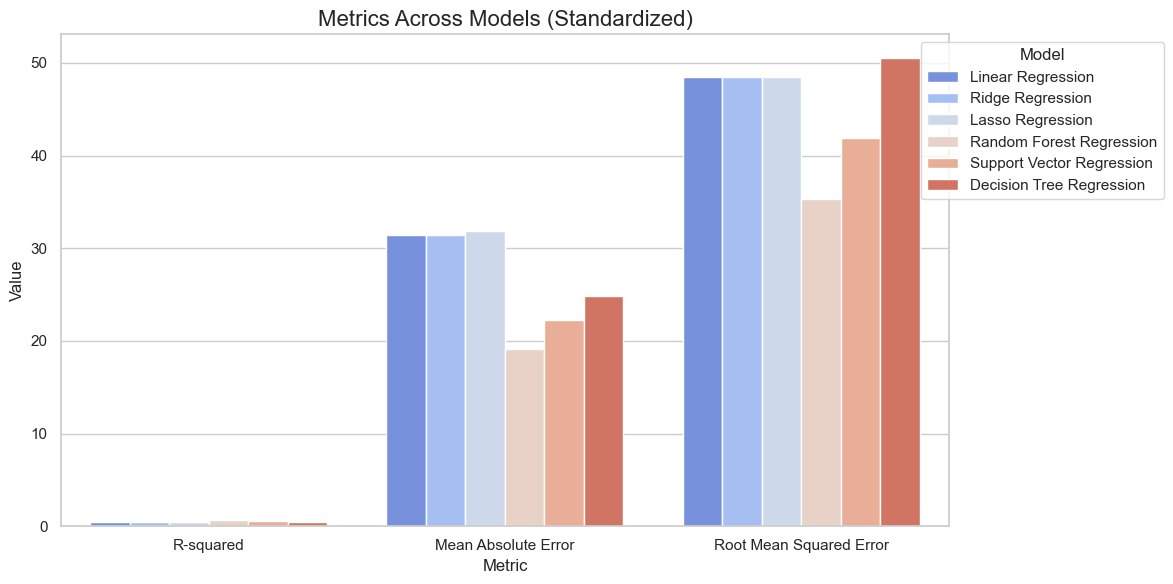

In [77]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Function to plot grouped bar charts for a specific dataset/imputation strategy
def plot_grouped_by_metrics(imputation_strategy, title, ylabel):
    # Filter data for the specific imputation strategy
    strategy_data = all_results[all_results['Imputation Strategy'] == imputation_strategy]
    
    # Melt data to get metrics as a column for grouping
    melted_data = strategy_data.melt(
        id_vars=['Model'],
        value_vars=['R-squared', 'Mean Absolute Error', 'Root Mean Squared Error'],
        var_name='Metric',
        value_name='Value'
    )
    
    # Create the grouped bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=melted_data,
        x='Metric',
        y='Value',
        hue='Model',
        palette='coolwarm'
    )
    plt.title(f"{title} ({imputation_strategy.capitalize()})", fontsize=16)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel("Metric", fontsize=12)
    plt.legend(title='Model', loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.tight_layout()
    plt.show()

# Plot for each imputation strategy
for strategy in all_results['Imputation Strategy'].unique():
    plot_grouped_by_metrics(strategy, "Metrics Across Models", "Value")


### plotting overall results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Imputation Strategy                 30 non-null     object 
 1   R-squared                           30 non-null     float64
 2   Mean Absolute Error                 30 non-null     float64
 3   Root Mean Squared Error             30 non-null     float64
 4   Model                               30 non-null     object 
 5   R-squared_normalized                30 non-null     float64
 6   Mean Absolute Error_normalized      30 non-null     float64
 7   Root Mean Squared Error_normalized  30 non-null     float64
 8   Overall Score                       30 non-null     float64
dtypes: float64(7), object(2)
memory usage: 2.2+ KB
None


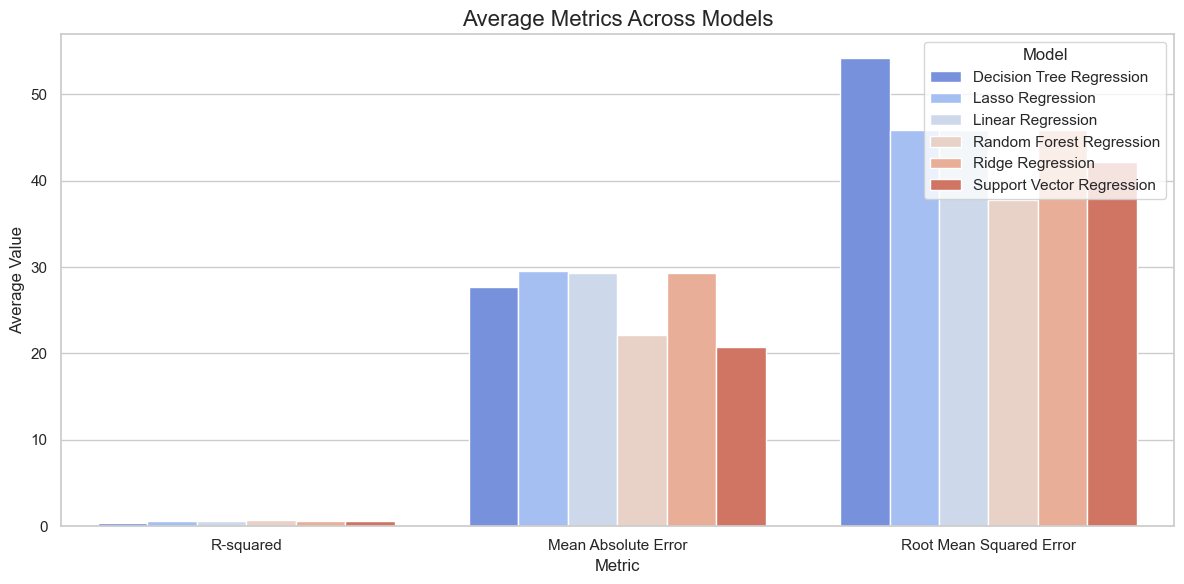

/var/folders/hq/zygjk6_x6_zbfsr0pys4v_qc0000gn/T/ipykernel_98963/2631912994.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_metrics, x='Model', y='R-squared', palette='viridis')


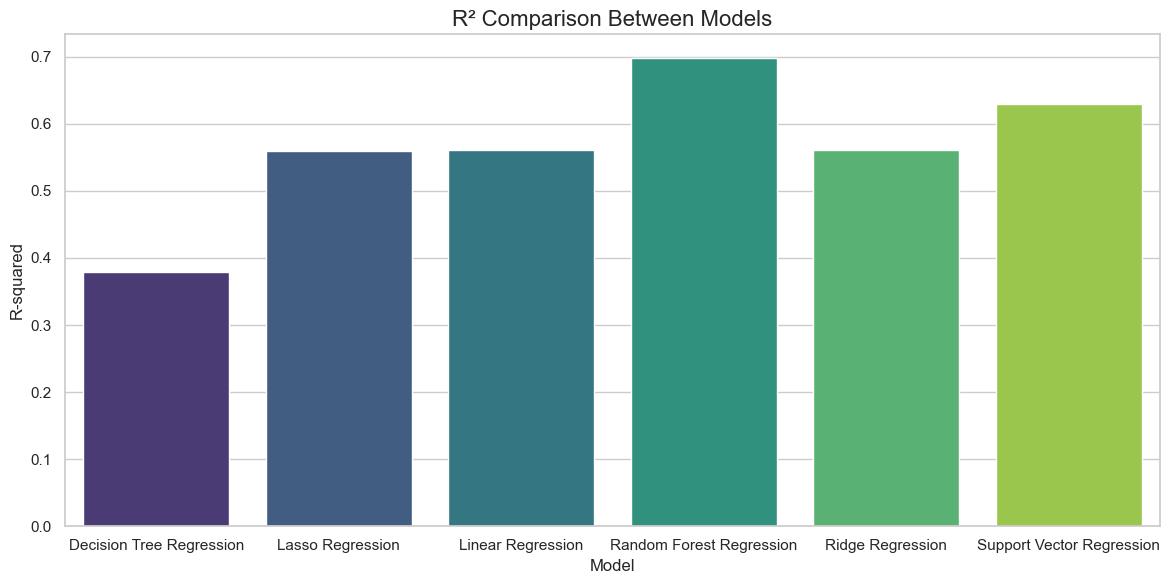

In [79]:
# Inspect the data types in all_results
print(all_results.info())

# Step 1: Compute Average Metrics Across Models (numeric columns only)
numeric_columns = ['R-squared', 'Mean Absolute Error', 'Root Mean Squared Error']
average_metrics = all_results.groupby('Model')[numeric_columns].mean().reset_index()

# Step 2: Plot Average Metrics Across Models
melted_avg_metrics = average_metrics.melt(
    id_vars='Model', 
    value_vars=numeric_columns,
    var_name='Metric', 
    value_name='Value'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_avg_metrics, x='Metric', y='Value', hue='Model', palette='coolwarm')
plt.title("Average Metrics Across Models", fontsize=16)
plt.ylabel("Average Value", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.legend(title="Model", loc='upper right')
plt.tight_layout()
plt.show()

# Step 3: Plot Accuracy (R-squared) Comparison Between Models
plt.figure(figsize=(12, 6))
sns.barplot(data=average_metrics, x='Model', y='R-squared', palette='viridis')
plt.title("R² Comparison Between Models", fontsize=16)
plt.ylabel("R-squared", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.tight_layout()
plt.show()
